In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions

In [2]:
dataset = pd.read_csv('../../archive/2019-Nov.csv', header='infer', nrows=10000)

dataset.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [3]:
# define a dictionary containing the number of every operation performed for every user_session

d = functions.ops_per_session(dataset)

In [4]:
# Question RQ1 - 1

# number of complete funnels in the dataset
functions.complete_funnels(d)

82

In [5]:
# Question RQ1 - 2
# operation users repeat more often within a session

dataset.groupby('event_type').event_type.count().idxmax()

'view'

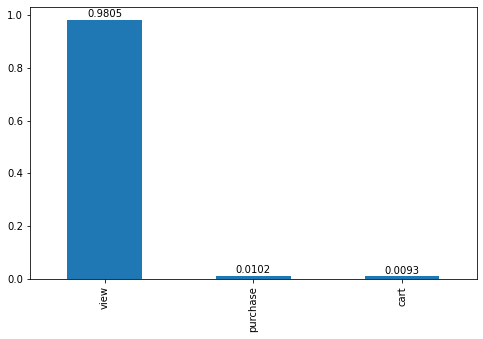

In [6]:
# Question RQ1 - 2
# plot average number of times users perform each operation

fig, ax = plt.subplots(figsize=(8,5))
dataset.event_type.value_counts(normalize=True).plot(ax=ax, kind='bar')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=4),(p.get_x()+p.get_width()/2., p.get_height()),
    ha='center',
    va='center',
    xytext=(0, 6),
    textcoords='offset points')

In [7]:
# Question RQ1 - 3
# how many times, on average, a user views a product before adding it to the cart?

dataset.groupby([dataset.user_session, dataset.event_type]).event_type.count()

user_session                          event_type
00274f82-8337-4282-b03a-777376efc3b5  view           1
004292d5-f9ab-476a-b89d-578da4e9ff02  view           2
005e878a-46ed-45b2-8ca6-d378fe0066b3  view           2
006f3e2c-ab8c-4285-8ab6-f3ed34272e5a  view          16
007f92ae-f7a5-4c11-912c-2f32d9bb6fad  view           6
                                                    ..
ffa4947f-8ead-4fa9-987d-f12c7516929d  view           1
ffda83eb-e689-430e-84c4-e0a931b3163e  view           1
fff30096-d345-43a4-8b01-329283095f38  cart           2
                                      view           2
fff3e70c-be41-49dd-900b-bbe6ca059dcf  view           3
Name: event_type, Length: 2590, dtype: int64

In [8]:
d

{'57357cc3-c173-48ed-a952-d5df1c7eba02': {'view': 1, 'seq': ['view']},
 '12d21960-6989-4474-9be7-640ed2b5eab8': {'view': 1, 'seq': ['view']},
 'acaada10-44a9-4657-9182-429e28a2dbd4': {'view': 1, 'seq': ['view']},
 '416ec503-a1c4-41ed-a384-1e2c22604fcf': {'view': 1, 'seq': ['view']},
 '47948cec-ac8f-448e-9a86-59be8fa46412': {'view': 1, 'seq': ['view']},
 '64db5a82-432b-4584-b624-62afc5b8215a': {'view': 2, 'seq': ['view', 'view']},
 '7a14fa0a-7547-4e7e-a324-364aa5dfec94': {'view': 1, 'seq': ['view']},
 '89872c4c-e761-45f8-af04-e76ab9d32b48': {'view': 1, 'seq': ['view']},
 '45593ce9-5f4a-4088-a71d-5cc28b10e075': {'view': 1, 'seq': ['view']},
 'da424f79-fc74-457e-8c1e-f29ebf2e563a': {'view': 3,
  'seq': ['view', 'view', 'view']},
 'd9d7e09d-be08-428b-8b39-561514b1b0b6': {'view': 1, 'seq': ['view']},
 '7ee09c1e-1b06-4e07-915a-4b4bbb24ea8b': {'view': 16,
  'seq': ['view',
   'view',
   'view',
   'view',
   'view',
   'view',
   'view',
   'view',
   'view',
   'view',
   'view',
   'view',
